<a href="https://colab.research.google.com/github/shootillidie/cs4410/blob/main/Diamonds_project_using_KNN_%26_SVM_Ariel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Diamonds project using KNN & SVM

By Ariel Bar-itzhack 25 Feb 2021

[Diamonds Dataset](https://www.kaggle.com/shivam2503/diamonds)

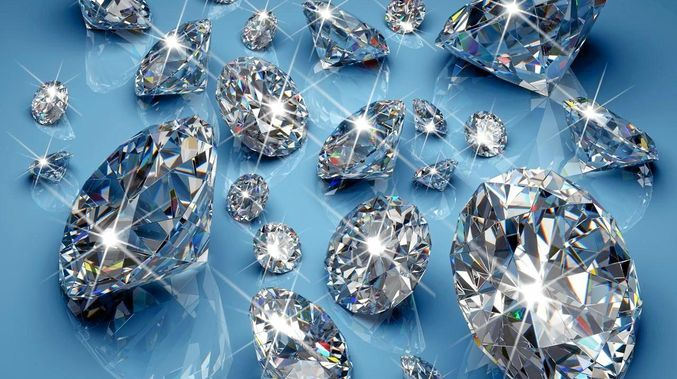

## Data Desciption

This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

#### Content

* price price in US dollars (\$326--\$18,823)

* carat weight of the diamond (0.2--5.01)

* cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

* color diamond colour, from J (worst) to D (best)

* clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

* x length in mm (0--10.74)

* y width in mm (0--58.9)

* z depth in mm (0--31.8)

* depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

* table width of top of diamond relative to widest point (43--95)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
#from sklearn.metrics import plot_confusion_matrix #depreciated

# Read and examine the Data

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/arielb30/datasets/main/diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
df.corr()[['price']].transpose()

<ipython-input-52-0d7c61588fb8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()[['price']].transpose()


,carat,depth,table,price,x,y,z
price,0.921591,-0.010647,0.127134,1.0,0.884435,0.865421,0.861249


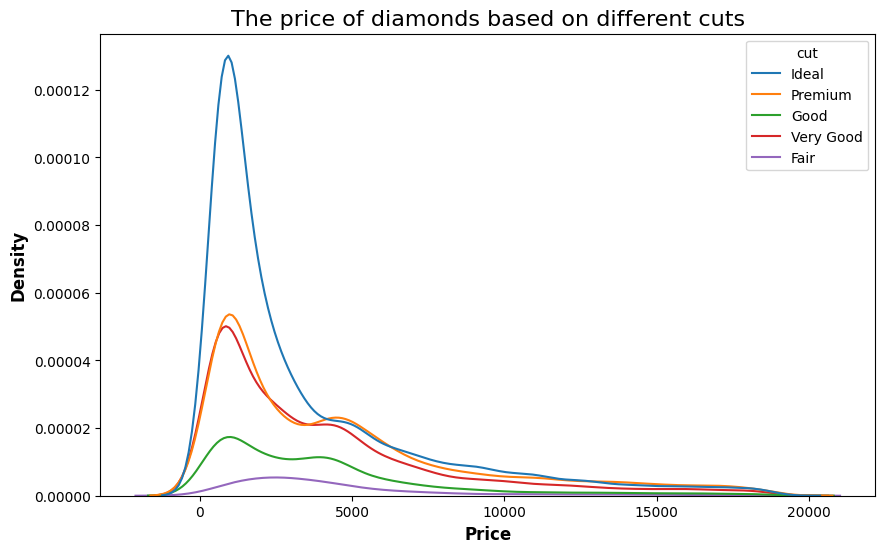

In [ ]:
plt.figure(figsize = (10,6))
sns.kdeplot(x = "price", data = df,hue = "cut")
plt.xlabel("Price", fontsize = 12, fontweight='bold')
plt.ylabel("Density", fontsize = 12,fontweight='bold')
plt.title("The price of diamonds based on different cuts",fontsize = 16);

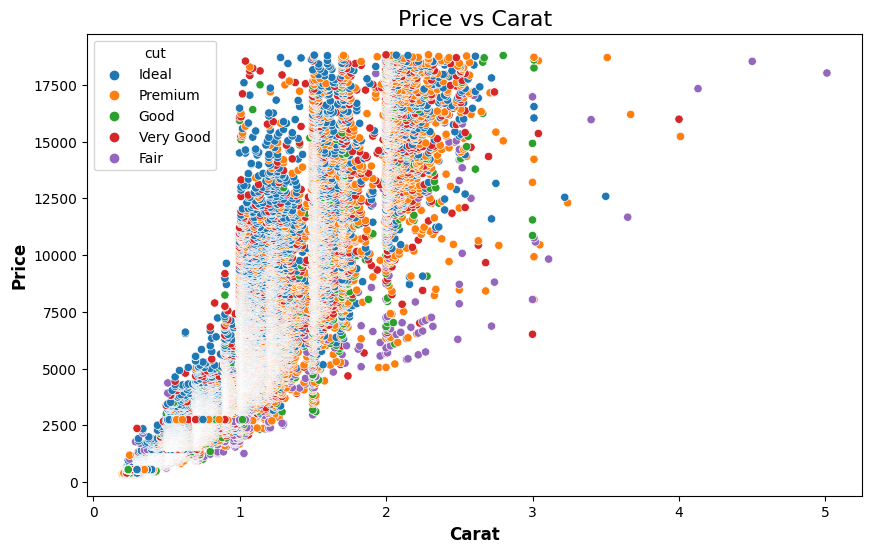

In [ ]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = "carat", y = "price", data = df, hue = "cut")
plt.xlabel("Carat",fontsize=12,fontweight='bold')
plt.ylabel("Price",fontsize=12,fontweight='bold')
plt.title("Price vs Carat",fontsize=16);

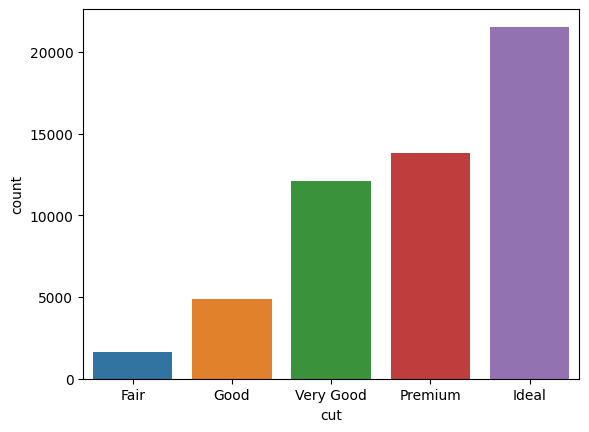

In [ ]:
order_cut = ['Fair','Good','Very Good','Premium','Ideal']
sns.countplot(x='cut',data=df,order = order_cut);

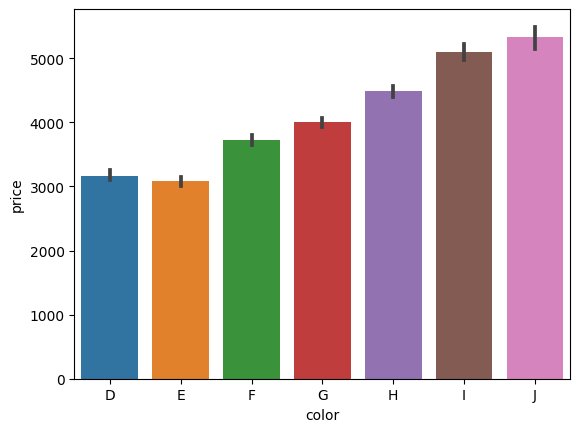

In [ ]:
order_col=['D','E','F','G','H','I','J']
sns.barplot(x='color',y='price',data=df,order=order_col);

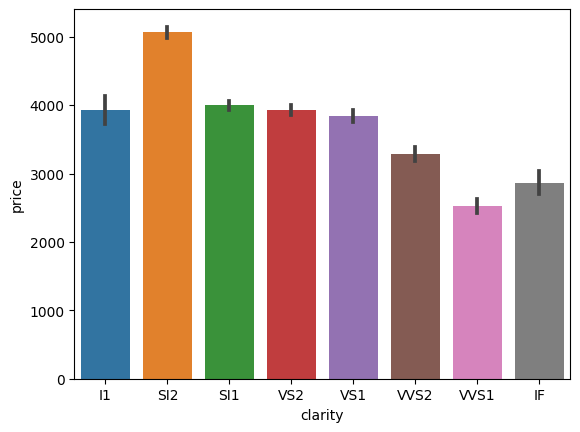

In [ ]:
order_clarity=['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']
sns.barplot(x='clarity',y='price',data=df, order=order_clarity);

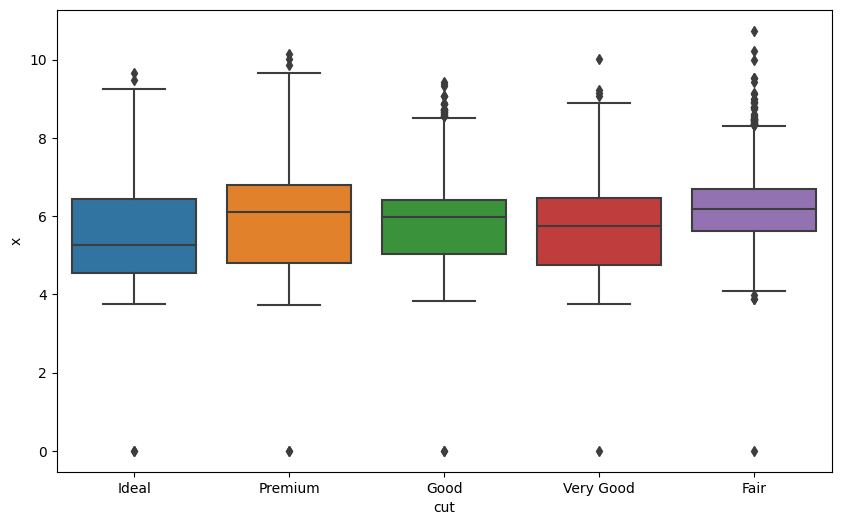

In [ ]:
plt.figure(figsize = (10,6))
sns.boxplot(x='cut',y='x',data=df);

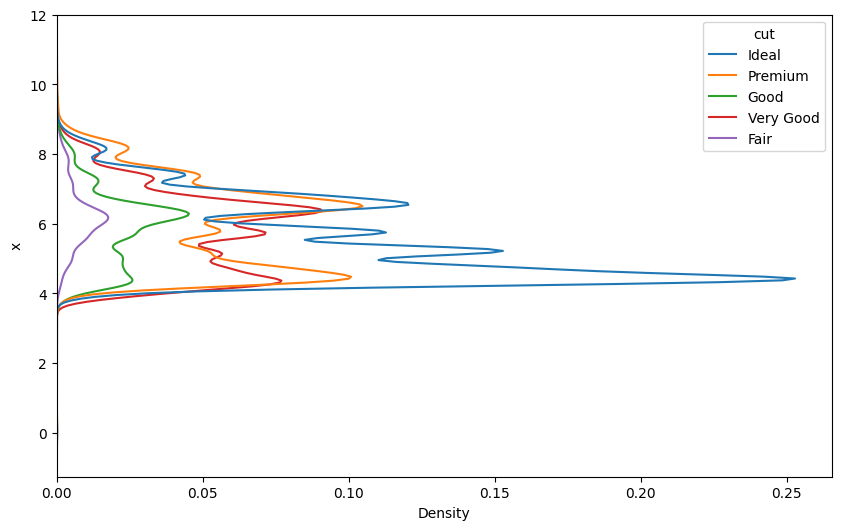

In [ ]:
plt.figure(figsize = (10,6))
sns.kdeplot(y='x',data=df, hue='cut');

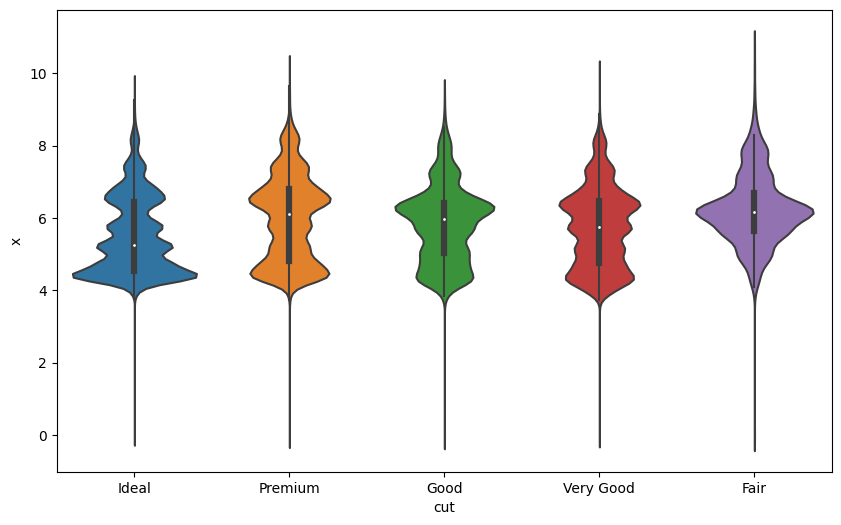

In [ ]:
plt.figure(figsize = (10,6))
sns.violinplot(x='cut',y='x',data=df);

# Data cleaning

In [ ]:
zeros=df[(df["x"]==0) | (df['y']==0) | (df['z']==0)]
zeros.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0


In [ ]:
df=df.drop(zeros.index)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53920 non-null  float64
 1   cut      53920 non-null  object 
 2   color    53920 non-null  object 
 3   clarity  53920 non-null  object 
 4   depth    53920 non-null  float64
 5   table    53920 non-null  float64
 6   price    53920 non-null  int64  
 7   x        53920 non-null  float64
 8   y        53920 non-null  float64
 9   z        53920 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


# Feature engineering

In [ ]:
df.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11597
x            553
y            550
z            374
dtype: int64

In [ ]:
df.select_dtypes('object').nunique()

cut        5
color      7
clarity    8
dtype: int64

In [ ]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [ ]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [ ]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [ ]:
df['cut']=df['cut'].replace({'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4})
df


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,4,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,2,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
df.groupby('color').mean().sort_values('price')[['price']]

<ipython-input-22-c47c6db732cc>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('color').mean().sort_values('price')[['price']]


,price
color,
E,3076.752475
D,3168.106436
F,3725.080205
G,3996.876551
H,4480.942155
I,5089.973990
J,5323.818020


In [ ]:
df['color']=df['color'].replace({'D':0, 'E':1, 'F':2, 'G':3, 'H':4, 'I':5, 'J':6})
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,1,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,4,0,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,0,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,2,0,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,4,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
df['clarity']=df['clarity'].replace({'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7})
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,1,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,1,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,4,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,2,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,4,1,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53920 non-null  float64
 1   cut      53920 non-null  int64  
 2   color    53920 non-null  int64  
 3   clarity  53920 non-null  int64  
 4   depth    53920 non-null  float64
 5   table    53920 non-null  float64
 6   price    53920 non-null  int64  
 7   x        53920 non-null  float64
 8   y        53920 non-null  float64
 9   z        53920 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 4.5 MB


In [ ]:
df['target'] = (df['price'] > df['price'].median()).astype('int64')
df

,carat,cut,color,clarity,depth,table,price,x,y,z,target
0,0.23,4,1,1,61.5,55.0,326,3.95,3.98,2.43,0
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31,0
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31,0
3,0.29,3,5,3,62.4,58.0,334,4.20,4.23,2.63,0
4,0.31,1,6,1,63.3,58.0,335,4.34,4.35,2.75,0
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,4,0,2,60.8,57.0,2757,5.75,5.76,3.50,1
53936,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61,1
53937,0.70,2,0,2,62.8,60.0,2757,5.66,5.68,3.56,1
53938,0.86,3,4,1,61.0,58.0,2757,6.15,6.12,3.74,1


In [ ]:
df['target'].value_counts()

0    26982
1    26938
Name: target, dtype: int64

In [ ]:
df.groupby('target').describe()['price']

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,26982.0,1125.569231,548.644922,326.0,694.00,951.0,1573.0,2401.0
1,26938.0,6740.999555,3967.604640,2402.0,3798.25,5327.0,8687.0,18823.0


In [ ]:
df['price'].median()

2401.0

In [ ]:
df['target']=pd.qcut(df['price'], q=4,labels=[0,1,2,3])
df

,carat,cut,color,clarity,depth,table,price,x,y,z,target
0,0.23,4,1,1,61.5,55.0,326,3.95,3.98,2.43,0
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31,0
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31,0
3,0.29,3,5,3,62.4,58.0,334,4.20,4.23,2.63,0
4,0.31,1,6,1,63.3,58.0,335,4.34,4.35,2.75,0
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,4,0,2,60.8,57.0,2757,5.75,5.76,3.50,2
53936,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61,2
53937,0.70,2,0,2,62.8,60.0,2757,5.66,5.68,3.56,2
53938,0.86,3,4,1,61.0,58.0,2757,6.15,6.12,3.74,2


In [ ]:
df['target'].value_counts()

1    13499
0    13483
3    13480
2    13458
Name: target, dtype: int64

In [ ]:
df.groupby('target').describe()['price']

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,13483.0,687.810650,149.318099,326.0,572.0,694.0,810.00,949.0
1,13499.0,1562.808949,443.628420,950.0,1133.0,1572.0,1919.00,2401.0
2,13458.0,3790.002452,852.368937,2402.0,3002.0,3797.5,4512.75,5323.0
3,13480.0,9687.180490,3654.922457,5324.0,6589.0,8682.0,12130.25,18823.0


In [ ]:
df[['price']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,53920.0,3930.993231,3987.280446,326.0,949.0,2401.0,5323.25,18823.0


In [ ]:
df.corr()[['price']].transpose()

<ipython-input-33-0d7c61588fb8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()[['price']].transpose()


,carat,cut,color,clarity,depth,table,price,x,y,z
price,0.921592,-0.053491,0.172431,-0.146789,-0.010729,0.127245,1.0,0.887231,0.867864,0.868206


In [ ]:
df=df.drop('price',axis=1)
df

,carat,cut,color,clarity,depth,table,x,y,z,target
0,0.23,4,1,1,61.5,55.0,3.95,3.98,2.43,0
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31,0
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31,0
3,0.29,3,5,3,62.4,58.0,4.20,4.23,2.63,0
4,0.31,1,6,1,63.3,58.0,4.34,4.35,2.75,0
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,4,0,2,60.8,57.0,5.75,5.76,3.50,2
53936,0.72,1,0,2,63.1,55.0,5.69,5.75,3.61,2
53937,0.70,2,0,2,62.8,60.0,5.66,5.68,3.56,2
53938,0.86,3,4,1,61.0,58.0,6.15,6.12,3.74,2


# Prepare train and test data

In [ ]:
X = df.drop(['target','price'],axis=1).to_numpy()
y = df['target'].to_numpy()
print("start: ",X.shape, y.shape)


start:  (53920, 9) (53920,)


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state = 42)
print("train: ", X_train.shape, y_train.shape)
print("test:  " , X_test.shape, y_test.shape)

train:  (43136, 9) (43136,)
test:   (10784, 9) (10784,)


In [ ]:
scaler = MinMaxScaler()
print('Before scaling:')
print('Max: ',X_train.max())
print('Min: ', X_train.min())

# fit and transfrom both train and test
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print('\nEverything has been scaled between 1 and 0')
print('Max: ',X_train.max())
print('Min: ', X_train.min())

Before scaling:
Max:  95.0
Min:  0.0

Everything has been scaled between 1 and 0
Max:  1.0
Min:  0.0


# Training and evaluation

### KNN

In [ ]:
#score test
for k in range(3,20,4):
    knn1 = KNeighborsClassifier(n_neighbors = k)
    knn1.fit(X_train,y_train)
    score = knn1.score(X_test, y_test)
    print("k = {} score test: {}".format(k,score))

k = 3 score test: 0.9003152818991098
k = 7 score test: 0.9079191394658753
k = 11 score test: 0.9055081602373887
k = 15 score test: 0.9038390207715133
k = 19 score test: 0.9016135014836796


In [ ]:
best_k = 7
knn1 = KNeighborsClassifier(n_neighbors = best_k)
knn1.fit(X_train,y_train)
score = knn1.score(X_test, y_test)
print("k = {} score test: {}".format(best_k,score))

k = 7 score test: 0.9079191394658753


In [ ]:
#confusion matrix test
pred1 = knn1.predict(X_test)
confusion_matrix(y_test,pred1)

array([[2510,  195,    0,    0],
       [ 230, 2283,  152,    1],
       [   0,  118, 2473,  140],
       [   0,    1,  156, 2525]])

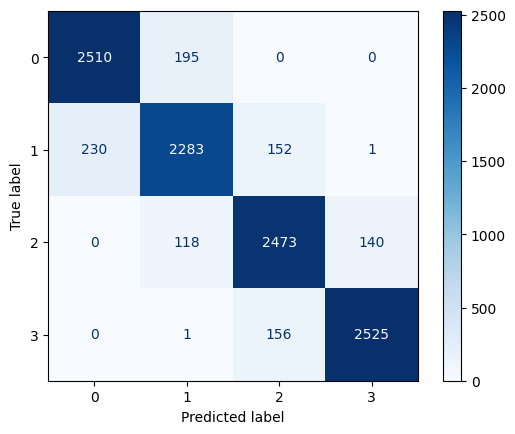

In [ ]:
#from sklearn.metrics import ConfusionMatrixDisplay #add to import section
ConfusionMatrixDisplay.from_estimator(knn1, X_test, y_test,values_format="d",cmap='Blues');
#plot_confusion_matrix(knn1, X_test, y_test,values_format="d",cmap='Blues'); depreciated


In [ ]:
#classification report test
print(classification_report(y_test,pred1,digits=4))

              precision    recall  f1-score   support

           0     0.9161    0.9279    0.9219      2705
           1     0.8791    0.8563    0.8676      2666
           2     0.8892    0.9055    0.8973      2731
           3     0.9471    0.9415    0.9443      2682

    accuracy                         0.9079     10784
   macro avg     0.9079    0.9078    0.9078     10784
weighted avg     0.9079    0.9079    0.9078     10784



### SVM

In [ ]:
from sklearn.svm import SVC
for kernel in ['linear','poly','rbf']:
  svm2 = SVC(kernel=kernel)
  svm2.fit(X_train, y_train)
  score = svm2.score(X_test, y_test)
  print("k = {} score test: {}".format(kernel,score))

k = linear score test: 0.9007789317507419
k = poly score test: 0.922106824925816
k = rbf score test: 0.9219213649851632


In [ ]:
best_kernel = 'poly'
svm2 = SVC(kernel=best_kernel)
svm2.fit(X_train, y_train)
score = svm2.score(X_test,y_test)
print("kernel = {} score test: {}".format(best_kernel,score))

kernel = poly score test: 0.922106824925816


In [ ]:
pred2=svm2.predict(X_test)
confusion_matrix(y_test,pred2)

array([[2568,  137,    0,    0],
       [ 203, 2334,  127,    2],
       [   0,  100, 2513,  118],
       [   0,    0,  153, 2529]])

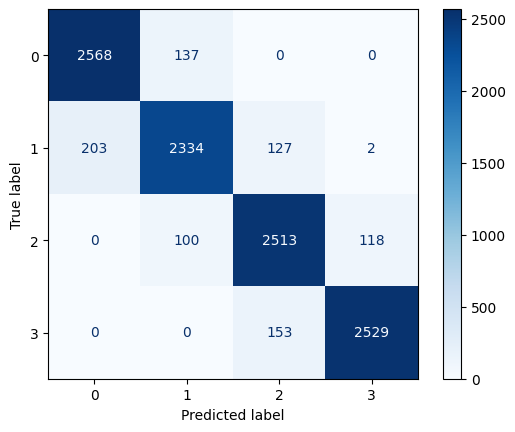

In [ ]:
ConfusionMatrixDisplay.from_estimator(svm2, X_test, y_test,values_format="d",cmap='Blues');
#plot_confusion_matrix(svm2, X_test, y_test,values_format="d",cmap='Blues'); #depreciated

In [ ]:
print(classification_report(y_test,pred2,digits=4))

              precision    recall  f1-score   support

           0     0.9267    0.9494    0.9379      2705
           1     0.9078    0.8755    0.8914      2666
           2     0.8997    0.9202    0.9098      2731
           3     0.9547    0.9430    0.9488      2682

    accuracy                         0.9221     10784
   macro avg     0.9223    0.9220    0.9220     10784
weighted avg     0.9222    0.9221    0.9220     10784

